# Analyzing Prosper Loan Data
## by Luming Zhang

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

This dataset has 113937 entries and 81 columns. 

### What is/are the main feature(s) of interest in your dataset?

I'm interested in the following problems: What factors affect a loan’s outcome status? What affects the borrower’s APR or interest rate?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think features like __'CreditGrade', 'BorrowerAPR', 'ProsperRating', 'IncomeRange', 'DebtToIncomeRatio', 'LoanStatus' and 'EmploymentStatus'__ maybe suppport the investigation. 

## Univariate Exploration


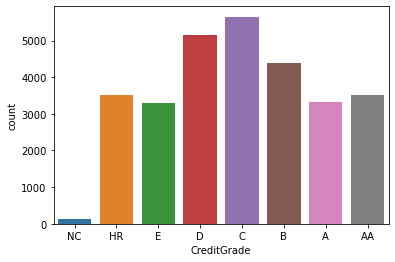

In [4]:
order = ['NC','HR','E','D','C','B','A','AA']
cg = pd.Categorical(df.CreditGrade, categories=order)
ax = sb.countplot(data=df, x=cg)
ax.set(xlabel='CreditGrade', ylabel='count')
plt.show();

As we can see from the plot, except __NC__, the distribution is nearly normal distribution. And the median is around grade __C__. 

In [5]:
BorrowerAPR = df['BorrowerAPR']
BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [6]:
BorrowerAPR = BorrowerAPR.dropna()

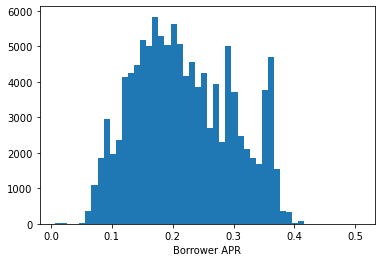

In [7]:
bins = np.arange(BorrowerAPR.min(), BorrowerAPR.max(), 0.01)
plt.hist(data=df, x='BorrowerAPR', bins=bins);
plt.xlabel('Borrower APR');

It seems to be a lttle right skewed distributed for __BorrowerAPR__. 

In [8]:
DebtToIncomeRatio = df['DebtToIncomeRatio']
DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [9]:
DebtToIncomeRatio = DebtToIncomeRatio.dropna()

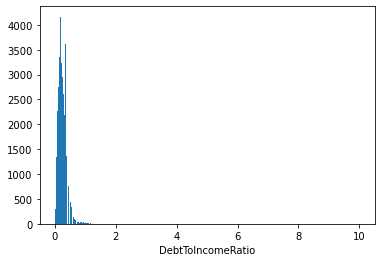

In [10]:
bins = np.arange(DebtToIncomeRatio.min(), DebtToIncomeRatio.max(), 0.01)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);
plt.xlabel('DebtToIncomeRatio')
plt.show();

There are not too many data between ratio 1.5 and 10. Therefore, we need to regard those data between ratio 1.5 and ratio 10 as outliers. As the result, we need to focus on data between ratio 0 and 1.5.

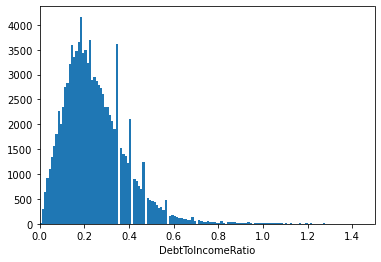

In [11]:
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);
plt.xlim(0,1.5);
plt.xlabel('DebtToIncomeRatio');

As we can see from the plot, this distribution is right skewed. And the median is near 0.2. It means that most of loans were given to borrowers whose debt is 5 times more than their income.

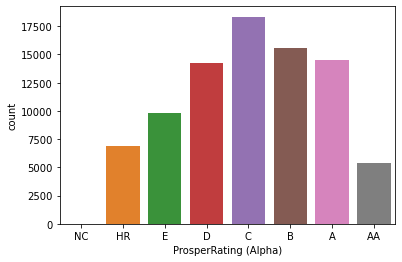

In [12]:
pra = pd.Categorical(df['ProsperRating (Alpha)'], categories=order)
ax = sb.countplot(data=df, x=pra)
ax.set(xlabel='ProsperRating (Alpha)', ylabel='count')
plt.show();

The distribution for __ProsperRating (Alpha)__ is nearly normal distribution with a little left skewed. The median is around rating __C__.

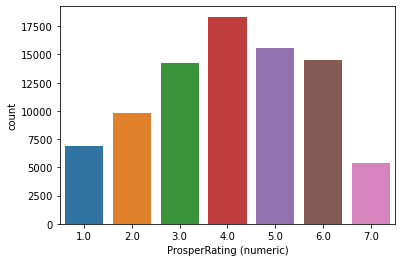

In [13]:
ax = sb.countplot(data=df, x='ProsperRating (numeric)')
ax.set(xlabel='ProsperRating (numeric)', ylabel='count')
plt.show();

The distribution for __ProsperRating (numeric)__ is likely a normal distribution with a little left skewed. The median is around rating __4.0__.

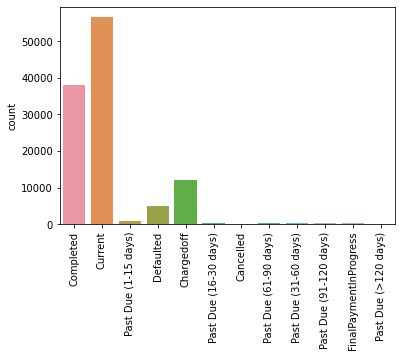

In [14]:
ls_order = ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)']
ls = pd.Categorical(df.LoanStatus, categories=ls_order)
sb.countplot(data=df, x=ls)
plt.xticks(rotation=90);

From the above plot, it is hardly to tell what the distribution is. But we can see the most loan status is 'Current'. The second one is 'Completed'.

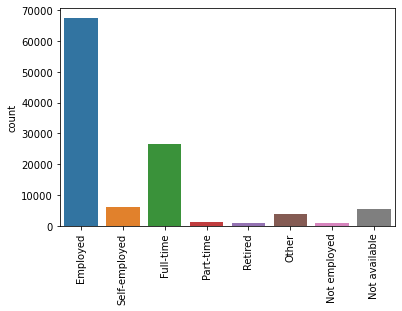

In [15]:
emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
es = pd.Categorical(df.EmploymentStatus, categories=emp_order)
sb.countplot(data=df, x=es)
plt.xticks(rotation=90);

As we can see from the above plot, most of the borrowers are employed. And 'Full_time' borrowers has a high percentage. Therefore, most loans were given to those borrowers who have a job. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of __CreditGrade__ and __ProsperRating__ are normally distributed. For __DebtToIncomeRatio__, there are outliers range from __1.5__ to __10.0__. Therefore, we need to adjust the x-axis ranging from __0__ to __1.5__. After adjusting, we can see the distribution of it is right skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of __DebtToIncomeRatio__ is highly skewed because of outliers. Those ourliers present those borrowers who has very high income with less debt. However, there are few borrowers who has high income. Therefore, those data need to be regarded as outliers, which means that they should be ignored from the data.

## Bivariate Exploration


In [16]:
sub = ['BorrowerAPR','BorrowerRate', 'ProsperRating (numeric)','ProsperScore', 'CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','LoanOriginalAmount']
df[sub].corr()

,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,LoanOriginalAmount
BorrowerAPR,1.000000,0.989824,-0.962151,-0.668287,-0.429707,-0.429707,0.056327,-0.322887
BorrowerRate,0.989824,1.000000,-0.953105,-0.649736,-0.461567,-0.461567,0.062917,-0.328960
ProsperRating (numeric),-0.962151,-0.953105,1.000000,0.705221,0.548874,0.548874,-0.135344,0.428557
ProsperScore,-0.668287,-0.649736,0.705221,1.000000,0.369603,0.369603,-0.145336,0.266293
CreditScoreRangeLower,-0.429707,-0.461567,0.548874,0.369603,1.000000,1.000000,-0.013169,0.340874
CreditScoreRangeUpper,-0.429707,-0.461567,0.548874,0.369603,1.000000,1.000000,-0.013169,0.340874
DebtToIncomeRatio,0.056327,0.062917,-0.135344,-0.145336,-0.013169,-0.013169,1.000000,0.010112
LoanOriginalAmount,-0.322887,-0.328960,0.428557,0.266293,0.340874,0.340874,0.010112,1.000000


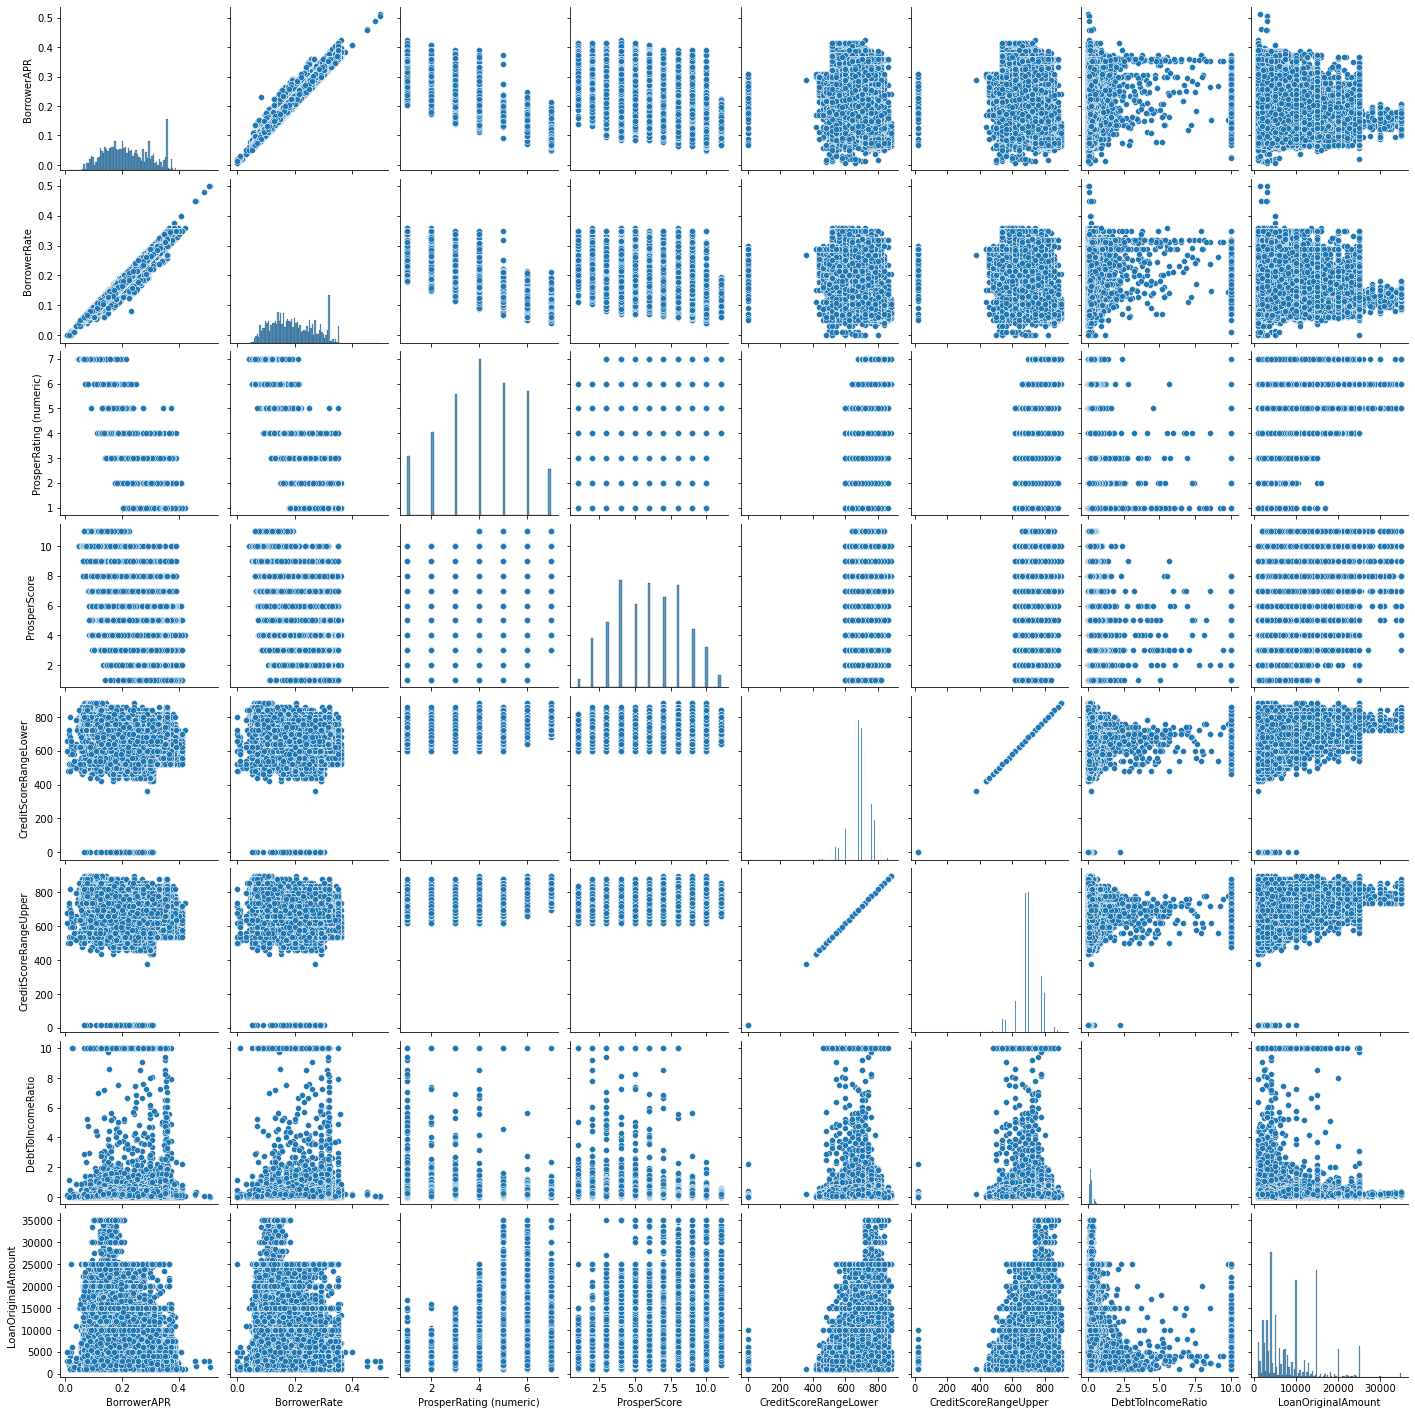

In [17]:
sb.pairplot(df[sub])

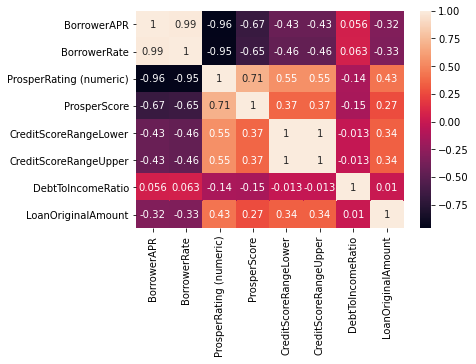

In [18]:
sb.heatmap(df[sub].corr(),annot = True)
plt.show();

From the correlation scatter plot and heatmap, we can see that __ProsperRating (numeric)__ is highly correlated with __BorrowerAPR__ and __BorrowerRate__. __BorrowerAPR__ and __BorrowerRate__ have the highest correlation between each other. At the begining, we assumed that __'DebtToIncomeRatio'__ maybe have impact on loan inerest. However, from the plots, we see that the correlation coefficient between __'DebtToIncomeRatio'__ and __BorrowerRate__ is nearly __0__, which means that there is no correlation between these two variables.

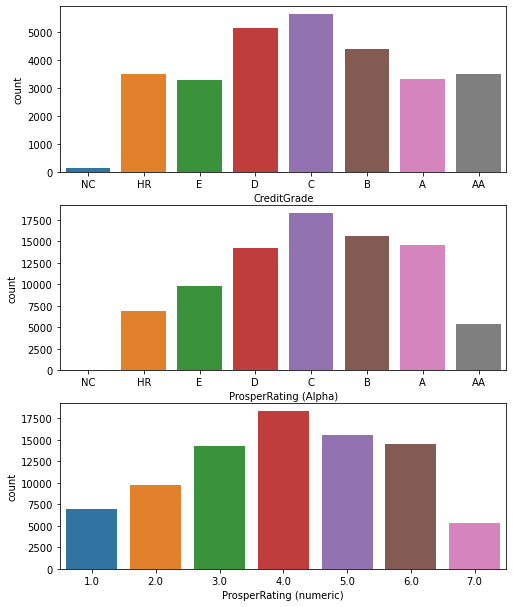

In [19]:
plt.figure(figsize=[8,14])

plt.subplot(4,1,1)
ax = sb.countplot(data=df, x=cg)
ax.set(xlabel='CreditGrade', ylabel='count')

plt.subplot(4,1,2)
ax = sb.countplot(data=df, x=pra)
ax.set(xlabel='ProsperRating (Alpha)', ylabel='count')

plt.subplot(4,1,3)
ax = sb.countplot(data=df, x='ProsperRating (numeric)')
ax.set(xlabel='ProsperRating (numeric)', ylabel='count')

plt.show();

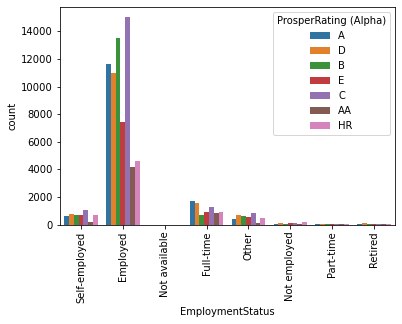

In [20]:
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)')
plt.xticks(rotation=90);

From the first graph, we see that grade __C__ has the most count of loans. And same for the second graph. And for the last graph, we see that __C__ of __ProsperRating (Alpha)__ has the most count of loans in __employed__ and __self-employed__ groups. However, for __Full-time__ group, __rating A__ has the most count of loans. This should be an interesting finding.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the fist analysis, we obtained that __ProsperRating (numeric)__ is highly correlated with __BorrowerAPR__ and __BorrowerRate__. And it is the negative correlation. Moverover, __BorrowerAPR__ and __BorrowerRate__ have the highest correlation between each other, which is the positive correlation. Moreover, there is no correlation between __'DebtToIncomeRatio'__ and __BorrowerRate__.

From the second analysis,grade __C__ has the most count of loans. And rating __C__ of __ProsperRating (Alpha)__ has the most count of loans in __employed__ and __self-employed__ groups. However, for __Full-time__ group, __rating A__ has the most count of loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting that there is no correlation between __'DebtToIncomeRatio'__ and __BorrowerRate__

## Multivariate Exploration


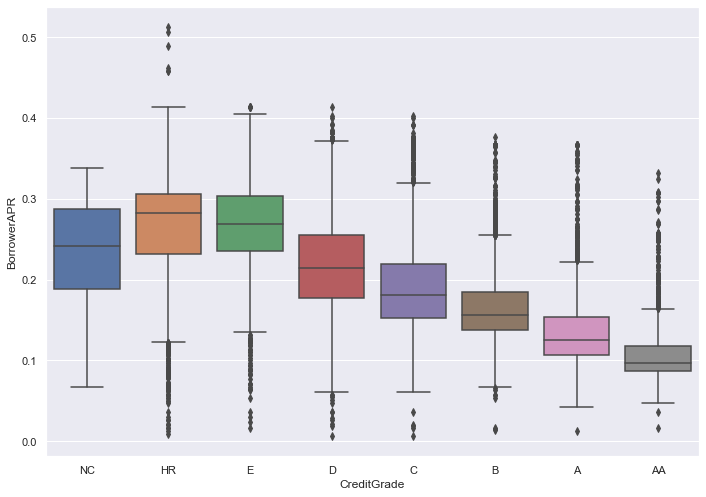

In [21]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
ax = sb.boxplot(x=cg,y=df['BorrowerAPR']);
ax.set(xlabel='CreditGrade', ylabel='BorrowerAPR');

With the change of credit grade, we can see that the trend of __BorrowerAPR__ goes down. The average __BorrowerAPR__ of credit grade __A__ is much less than the __BorrowerAPR__ of credit grade __HR__. This means that high risk borrowers has a high APR than safe borrowers. 

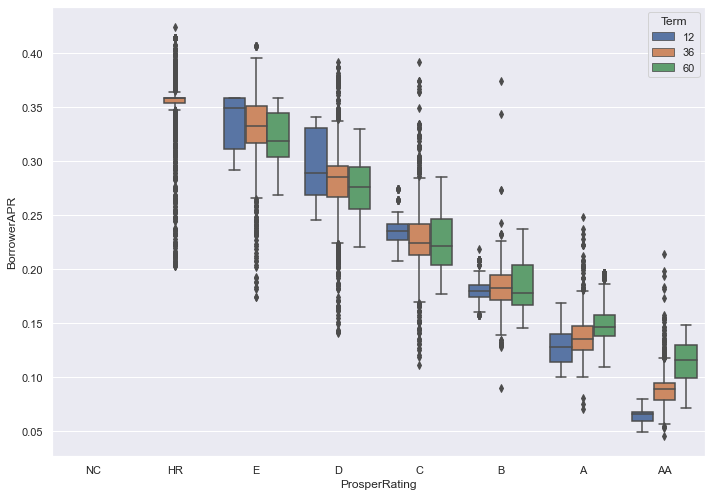

In [22]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
ax = sb.boxplot(x=pra,y=df['BorrowerAPR'],hue = df['Term']);
ax.set(xlabel='ProsperRating', ylabel='BorrowerAPR');

Overall, the trend of __BorrowerAPR__ is decreasing with the __ProsperRating__ goes up, which means that borrowers with high __ProsperRating__ would have lower APR. By observing the __Term__ of each group, We can see that for low prosperrating borrowers, they likely have 12 months loan with higher APR and 60 months loan with lower APR. And for high prosper rating borrowers, they likely have 60 months loan with higher APR and 12 months loan with lower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I analyzed the relationship between __BorrowerAPR__ and __CreditGrade__, and between __BorrowerAPR__ and __ProsperRating__ with subgroup __Term__. For the relationship between __BorrowerAPR__ and __CreditGrade__, we obtained high risk borrowers likely has a high APR than safe borrowers. For __BorrowerAPR__ and __ProsperRating__ with subgroup __Term__, the trend of __BorrowerAPR__ is decreasing with the __ProsperRating__ goes up, which means that borrowers with high __ProsperRating__ would have lower APR.

### Were there any interesting or surprising interactions between features?

For low prosperrating borrowers, they likely have 12 months loan with higher APR and 60 months loan with lower APR. And for high prosper rating borrowers, they likely have 60 months loan with higher APR and 12 months loan with lower APR.